<a href="https://colab.research.google.com/github/danaSror/AnalyzingEventsInCountries-/blob/main/Analyzing_Events_In_Countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🌟 **Analyzing Events In Countries**  🌟
---


◽ It is necessary to switch to a **GPU** in order to shorten the running times

◽ After completing the installation step the notebook should be restart


# Installation

In [ ]:
!pip install afinn
!pip install turicreate
!pip install wordcloud
!pip install imageio
!pip install plotly_express
!pip install pyyaml==5.4.1
!pip install summarizers -q
!pip3 install snscrape
!pip install bertopic
!pip install GoogleNews
!pip install python-bidi
!pip install geopy
!pip install geopandas
!pip install imageio
!pip3 install imageai --upgrade

import nltk
nltk.download('punkt')
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.0.4-cp37-cp37m-manylinux2010_x86_64.whl (86.4 MB)
  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Using cached tensorboard-2.0.2-py3-none-any.whl (3.8 MB)
  Using cached tensorflow_estimator-2.0.1-py2.py3-none-any.whl (449 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached numba-0.55.2-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numba-0.55.1-1-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numba-0.55.0-1-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numba-

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.19.3-cp37-cp37m-manylinux2010_x86_64.whl (14.9 MB)
  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully u

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Analyzing**
I selected 4 countries in order to obtain as much information as possible for analysis.
The main state I have focused on is **Mississippi** and the other states are Chicago, Connecticut and Georgia.
The goal is to analyze and describe the sequence of events that took place in the chosen country following the reversal of the ruling of Row v. Wade

---
**My solution to the problem described is:**

🔹 Search for information on the Twitter network in the date range from 24/6/2022 to the present day with various search queries containing keywords regarding the cancellation of Rowe's judgment against Wade and the names of the countries I have chosen.

🔹 Organization of the information for a different dataset - each for a particular country with all the tweets found in the requested date range.

🔹 For each data set of a country I did the following:

* I created a dictionary where the keys are all the dates..and the value for each date is the most common word mentioned on this date.
* Then I created a DF of events and dates - each event is one tweet selected and contains the most common words for a particular date out of all the tweets on that date. For that tweet, I made a summary so that the event would be as concise and concise as possible.

🔹 I represented the different events that were discovered concerning the dates in 3 different ways:

 1️⃣	 Create a visual timeline of events for each country individually.

2️⃣ Create a graph depicting the change of events concerning the change of dates in each country.

3️⃣ Creates a summary map of all the dates - showing for each date in which countries certain events have taken place related to the reversal of the ruling against Roe v. Wade.


---


I will now present a prototype for solving the problem I presented in the previous section:


### Initial preparation of the data

In [ ]:
import tweepy as tw
import pandas as pd


CONSUMER_KEY = 'lwGc7BqUKODAsmLchbI7NxsD9'
CONSUMER_SECRET = 'eFLyC3NyUOcVbUjWkItxxTvnIjoiKgvxkRp8gFn8kzfHjiIj9g'

auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)

query_list =[ "Roe V Wade Chicago-filter:retweets",
 "Roe V Wade Connecticut-filter:retweets",
  "Roe V Wade Georgia-filter:retweets",
  "Roe V Wade Mississippi-filter:retweets",
  "Roe v. Wade Chicago-filter:retweets",
  "Roe v. Wade Connecticut-filter:retweets",
  "Roe v. Wade Georgia-filter:retweets",
  "Ruling On Roe v. Wade Mississippi-filter:retweets",
  "Ruling On Roe v. Wade Chicago-filter:retweets",
  "Ruling On Roe v. Wade Georgia-filter:retweets",
  "Ruling On Roe v. Wade Connecticut-filter:retweets"
  ]

tweets_res = []

for query in query_list:
  tweets = tw.Cursor(api.search,
                q=query,
                lang="en",
                since="2022-06-20").items(10000)

  # store the API responses in a list
  for tweet in tweets:
      tweets_res.append(tweet)


dict_ = {'Tweet Id':[],'Date': [], 'Text': []}
for status in tweets_res:
    dict_['Tweet Id'].append(status.id)
    dict_['Text'].append(status.text)
    date = str(status.created_at).split()
    dict_['Date'].append(date[0])

twitter_df = pd.concat({k: pd.Series(v) for k, v in dict_.items()}, axis=1)
twitter_df

,Tweet Id,Date,Text
0,1545079025986592770,2022-07-07,Reasons for low voter turnout:\n1. There is an...
1,1545045482203860992,2022-07-07,"Before 'Roe v. Wade,' The Women of 'Jane' Prov..."
2,1544810924271353856,2022-07-06,Reproductive rights and bodily autonomy should...
3,1544793764492939265,2022-07-06,Political Forum’s @TrulySylvia was on the scen...
4,1544777117304504325,2022-07-06,Chicago-Kent professor emeritus Lori Andrews d...
...,...,...,...
1646,1541756071030599680,2022-06-28,Gay Connecticut Supreme Court justice calls ou...
1647,1541749540822388738,2022-06-28,Gay Connecticut Supreme Court justice calls ou...
1648,1541749040936787968,2022-06-28,Gay Connecticut Supreme Court justice calls ou...
1649,1541744365290356736,2022-06-28,Gay Connecticut Supreme Court justice calls ou...


In [ ]:
from afinn import Afinn
afinn = Afinn(emoticons=True)

def clean_tweet(text):
  lst = text.split()
  new_text = ""
  for token in lst:
    if "http" in token or "…" in token:
      continue
    else:
      new_text += " "+ token
  return new_text

twitter_df['Affin Score'] = twitter_df['Text'].apply(lambda t: afinn.score(t))
twitter_df['Tweet Position'] = twitter_df['Affin Score'].apply(lambda t: 'Supporter' if t >=0 else 'opposed')
twitter_df['Text'] = twitter_df['Text'].apply(lambda x: clean_tweet(x))
twitter_df

,Tweet Id,Date,Text,Affin Score,Tweet Position
0,1545079025986592770,2022-07-07,Reasons for low voter turnout: 1. There is an...,0.0,Supporter
1,1545045482203860992,2022-07-07,"Before 'Roe v. Wade,' The Women of 'Jane' Pro...",0.0,Supporter
2,1544810924271353856,2022-07-06,Reproductive rights and bodily autonomy shoul...,0.0,Supporter
3,1544793764492939265,2022-07-06,Political Forum’s @TrulySylvia was on the sce...,4.0,Supporter
4,1544777117304504325,2022-07-06,Chicago-Kent professor emeritus Lori Andrews ...,0.0,Supporter
...,...,...,...,...,...
1646,1541756071030599680,2022-06-28,Gay Connecticut Supreme Court justice calls o...,12.0,Supporter
1647,1541749540822388738,2022-06-28,Gay Connecticut Supreme Court justice calls o...,12.0,Supporter
1648,1541749040936787968,2022-06-28,Gay Connecticut Supreme Court justice calls o...,12.0,Supporter
1649,1541744365290356736,2022-06-28,Gay Connecticut Supreme Court justice calls o...,12.0,Supporter


### Event detection - 1️⃣ visualization way

Mississippi

In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from summarizers import Summarizers

summ = Summarizers()

df_Mississippi = twitter_df[twitter_df['Text'].str.contains('Mississippi')]
df_Mississippi = df_Mississippi.sort_values(by=['Date'])

dates = df_Mississippi['Date'].unique()
dates_dict = dict.fromkeys(dates, "")

for i in range(0,len(dates)):
  txt_for_day = ""

  for idx in df_Mississippi.index:
      if df_Mississippi['Date'][idx] == dates[i]:
        txt_for_day += " "+df_Mississippi['Text'][idx]

  txt_for_day = txt_for_day.replace("Wade","")
  txt_for_day = txt_for_day.replace("Roe","")
  txt_for_day = txt_for_day.replace("Mississippi","")
  dates_dict[dates[i]] += txt_for_day

commun_ngrams_dict = dict.fromkeys(dates, "")

stop_words_set = set(stopwords.words("english"))
# Trying to identify for each date the most common words in all the tweets for that day .. and maybe this will indicate a particular event.
for k,v in dates_dict.items():
  words_list = word_tokenize(v)
  words_list = [w for w in words_list if w.lower() not in stop_words_set and len(w)>2]
  c = Counter(words_list)
  commun_ngrams_dict[k] = c.most_common(3)

def isTweetContainsAllTokens(tweet,L):
    for w in L:
      if w not in tweet:
        return False
    return True

events_dict = dict.fromkeys(dates, "")

for i in range(0,len(dates)):
  selected_tweet = ""
  found = False

  for idx in df_Mississippi.index:
      if df_Mississippi['Date'][idx] == dates[i] and not found:
        common_lst = [tup[0] for tup in commun_ngrams_dict[dates[i]]]
        if isTweetContainsAllTokens(df_Mississippi['Text'][idx],common_lst):
          selected_tweet = df_Mississippi['Text'][idx]
          selected_tweet = summ(selected_tweet)
          events_dict[dates[i]] += selected_tweet
          found = True

# Handling empty dates in which no popular event has been found
for k,v in events_dict.items():
  if v == "":
    for idx in df_Mississippi.index:
      if df_Mississippi['Date'][idx] == k:
        events_dict[k] += summ(df_Mississippi['Text'][idx])
        break

Mississippi_events_df = pd.DataFrame(list(events_dict.items()),columns = ['Date','Event'])
Mississippi_events_df

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BartTokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


,Date,Event
0,2022-06-28,The US Supreme Court ruled 6-3 to uphold a Mis...
1,2022-06-29,CNN's Menakarw breaks down the history of Miss...
2,2022-06-30,Mississippi ends the Roe v. Wade baby genocide.
3,2022-07-01,"HB 5, a 15-week abortion ban modeled after the..."
4,2022-07-02,Solicitor General Scott Stewart of Mississippi...
5,2022-07-03,Mississippi Gov. Reeves focuses on ‘culture of...
6,2022-07-04,Mississippi Gov. Reeves focuses on ‘culture of...
7,2022-07-05,Mississippi judge refuses to block abortion ban.
8,2022-07-06,Mississippi set for abortion ban after judge r...
9,2022-07-07,@jmpalma02: Mississippi's final abortion clini...


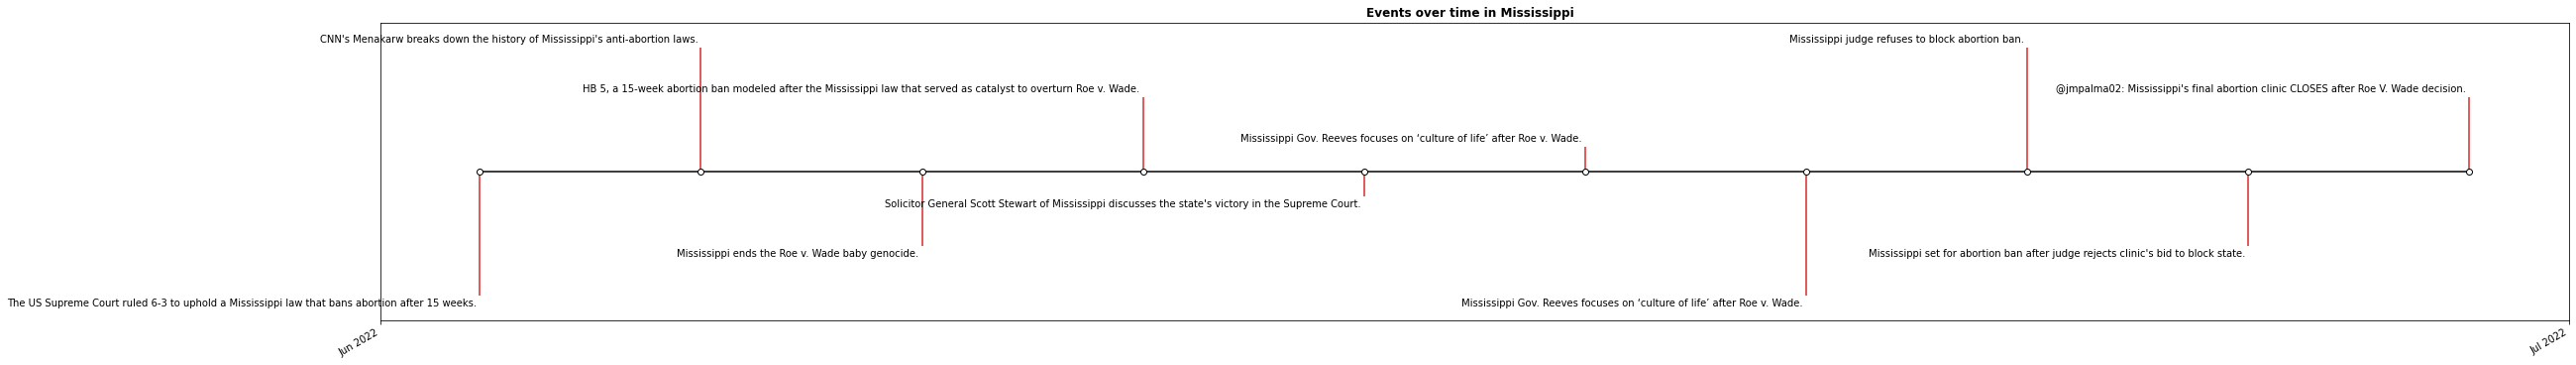

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

names = list(Mississippi_events_df['Event'])
dates = list(Mississippi_events_df['Date'])

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(36, 5), constrained_layout=True)
ax.set()
ax.set_title("Events over time in Mississippi  ", fontweight ="bold",loc='center')

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
#ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

Chicago

In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

df_Chicago = twitter_df[twitter_df['Text'].str.contains('Chicago ')]
df_Chicago = df_Chicago.sort_values(by=['Date'])

dates = df_Chicago['Date'].unique()
dates_dict = dict.fromkeys(dates, "")

for i in range(0,len(dates)):
  txt_for_day = ""

  for idx in df_Chicago.index:
      if df_Chicago['Date'][idx] == dates[i]:
        txt_for_day += " "+df_Chicago['Text'][idx]

  txt_for_day = txt_for_day.replace("Wade","")
  txt_for_day = txt_for_day.replace("Roe","")
  txt_for_day = txt_for_day.replace("Chicago","")
  dates_dict[dates[i]] += txt_for_day

commun_ngrams_dict = dict.fromkeys(dates, "")

stop_words_set = set(stopwords.words("english"))
# Trying to identify for each date the most common words in all the tweets for that day .. and maybe this will indicate a particular event.
for k,v in dates_dict.items():
  words_list = word_tokenize(v)
  words_list = [w for w in words_list if w.lower() not in stop_words_set and len(w)>2]
  c = Counter(words_list)
  commun_ngrams_dict[k] = c.most_common(3)

def isTweetContainsAllTokens(tweet,L):
    for w in L:
      if w not in tweet:
        return False
    return True

events_dict = dict.fromkeys(dates, "")

for i in range(0,len(dates)):
  selected_tweet = ""
  found = False

  for idx in df_Chicago.index:
      if df_Chicago['Date'][idx] == dates[i] and not found:
        common_lst = [tup[0] for tup in commun_ngrams_dict[dates[i]]]
        if isTweetContainsAllTokens(df_Chicago['Text'][idx],common_lst):
          selected_tweet = df_Chicago['Text'][idx]
          selected_tweet = summ(selected_tweet)
          events_dict[dates[i]] += selected_tweet
          found = True

# Handling empty dates in which no popular event has been found
for k,v in events_dict.items():
  if v == "":
    for idx in df_Chicago.index:
      if df_Chicago['Date'][idx] == k:
        events_dict[k] += summ(df_Chicago['Text'][idx])
        break

Chicago_events_df = pd.DataFrame(list(events_dict.items()),columns = ['Date','Event'])
Chicago_events_df

,Date,Event
0,2022-06-28,Chicago Mayor Lori Lightfoot unleashes tirade ...
1,2022-06-29,CNN.com will feature iReporter photos in a wee...
2,2022-06-30,In the 60s an underground organisation in Chic...
3,2022-07-01,Archdiocese of Chicago criticizes Illinois sta...
4,2022-07-02,Archdiocese of Chicago criticizes Illinois sta...
5,2022-07-03,Sara Feigenholtz faces backlash from Archdioce...
6,2022-07-04,A Chicago suburb shooting leaves at least 6 de...
7,2022-07-05,"@RepValDemings: ""I'm not sure I'm ready to tal..."
8,2022-07-06,Political Forum’s @TrulySylvia was on the scen...
9,2022-07-07,Chicago has one of the lowest voter turnout ra...


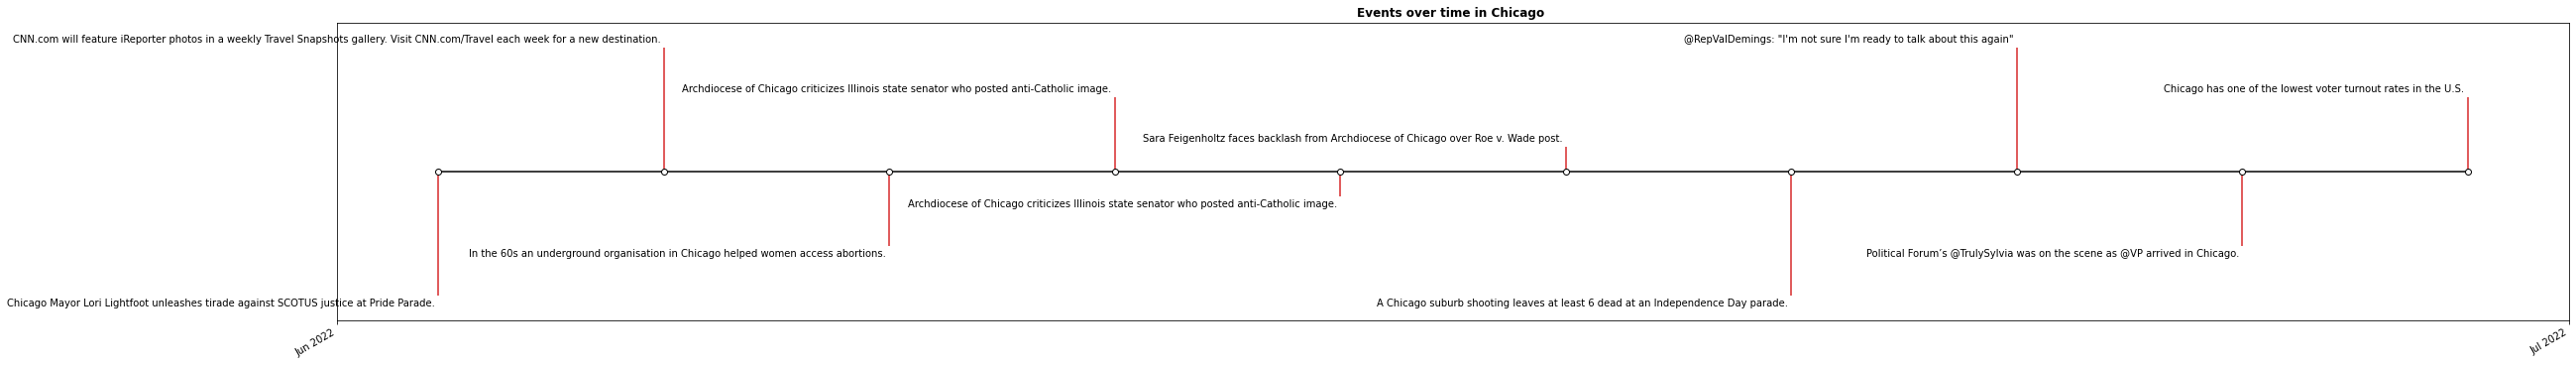

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

names = list(Chicago_events_df['Event'])
dates = list(Chicago_events_df['Date'])

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(36, 5), constrained_layout=True)
ax.set()
ax.set_title("Events over time in Chicago ", fontweight ="bold",loc='center')

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)

ax.margins(y=0.1)
plt.show()

Georgia

In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

df_Georgia = twitter_df[twitter_df['Text'].str.contains('Georgia')]

df_Georgia = df_Georgia.sort_values(by=['Date'])

dates = df_Georgia['Date'].unique()
dates_dict = dict.fromkeys(dates, "")

for i in range(0,len(dates)):
  txt_for_day = ""

  for idx in df_Georgia.index:
      if df_Georgia['Date'][idx] == dates[i]:
        txt_for_day += " "+df_Georgia['Text'][idx]

  txt_for_day = txt_for_day.replace("Wade","")
  txt_for_day = txt_for_day.replace("Roe","")
  txt_for_day = txt_for_day.replace("Georgia","")
  dates_dict[dates[i]] += txt_for_day

commun_ngrams_dict = dict.fromkeys(dates, "")

stop_words_set = set(stopwords.words("english"))
# Trying to identify for each date the most common words in all the tweets for that day .. and maybe this will indicate a particular event.
for k,v in dates_dict.items():
  words_list = word_tokenize(v)
  words_list = [w for w in words_list if w.lower() not in stop_words_set and len(w)>2]
  c = Counter(words_list)
  commun_ngrams_dict[k] = c.most_common(3)


def isTweetContainsAllTokens(tweet,L):
    for w in L:
      if w not in tweet:
        return False
    return True

events_dict = dict.fromkeys(dates, "")

for i in range(0,len(dates)):
  selected_tweet = ""
  found = False

  for idx in df_Georgia.index:
      if df_Georgia['Date'][idx] == dates[i] and not found:
        common_lst = [tup[0] for tup in commun_ngrams_dict[dates[i]]]
        if isTweetContainsAllTokens(df_Georgia['Text'][idx],common_lst):
          selected_tweet = df_Georgia['Text'][idx]
          selected_tweet = summ(selected_tweet)
          events_dict[dates[i]] += selected_tweet
          found = True

# Handling empty dates in which no popular event has been found
for k,v in events_dict.items():
  if v == "":
    for idx in df_Georgia.index:
      if df_Georgia['Date'][idx] == k:
        events_dict[k] += summ(df_Georgia['Text'][idx])
        break

Georgia_events_df = pd.DataFrame(list(events_dict.items()),columns = ['Date','Event'])
Georgia_events_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Date,Event
0,2022-06-28,Stacey Abrams on the End of Roe v. Wade and Wh...
1,2022-06-29,@StaceyAbrams on the End of Roe v. Wade and Wh...
2,2022-06-30,"Georgia's ""heartbeat bill"" is currently on pause."
3,2022-07-01,"In Georgia, the overturning Roe v Wade and a l..."
4,2022-07-02,"@genebailey God is moving, praise the Lord!"
5,2022-07-03,Doe v. Bolton was a 1973 Supreme Court decision.
6,2022-07-04,Stacey Abrams: It’s 'Dangerous' For Georgia Wo...
7,2022-07-05,"10 of the states moving against abortion, incl..."
8,2022-07-06,F in chat for the evil Georgia Guidestones. UL...
9,2022-07-07,Roe v Wade is overturned on June 24th.


Connecticut

In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords

df_Connecticut = twitter_df[twitter_df['Text'].str.contains('Connecticut')]
df_Connecticut = df_Connecticut.sort_values(by=['Date'])

dates = df_Connecticut['Date'].unique()
dates_dict = dict.fromkeys(dates, "")

for i in range(0,len(dates)):
  txt_for_day = ""

  for idx in df_Connecticut.index:
      if df_Connecticut['Date'][idx] == dates[i]:
        txt_for_day += " "+df_Connecticut['Text'][idx]

  txt_for_day = txt_for_day.replace("Wade","")
  txt_for_day = txt_for_day.replace("Roe","")
  txt_for_day = txt_for_day.replace("Connecticut","")
  dates_dict[dates[i]] += txt_for_day

commun_ngrams_dict = dict.fromkeys(dates, "")

stop_words_set = set(stopwords.words("english"))
# Trying to identify for each date the most common words in all the tweets for that day .. and maybe this will indicate a particular event.
for k,v in dates_dict.items():
  words_list = word_tokenize(v)
  words_list = [w for w in words_list if w.lower() not in stop_words_set and len(w)>2]
  c = Counter(words_list)
  commun_ngrams_dict[k] = c.most_common(3)

def isTweetContainsAllTokens(tweet,L):
    for w in L:
      if w not in tweet:
        return False
    return True

events_dict = dict.fromkeys(dates, "")

for i in range(0,len(dates)):
  selected_tweet = ""
  found = False

  for idx in df_Connecticut.index:
      if df_Connecticut['Date'][idx] == dates[i] and not found:
        common_lst = [tup[0] for tup in commun_ngrams_dict[dates[i]]]
        if isTweetContainsAllTokens(df_Connecticut['Text'][idx],common_lst):
          selected_tweet = df_Connecticut['Text'][idx]
          selected_tweet = summ(selected_tweet)
          events_dict[dates[i]] += selected_tweet
          found = True

# Handling empty dates in which no popular event has been found
for k,v in events_dict.items():
  if v == "":
    for idx in df_Connecticut.index:
      if df_Connecticut['Date'][idx] == k:
        events_dict[k] += summ(df_Connecticut['Text'][idx])
        break

Connecticut_events_df = pd.DataFrame(list(events_dict.items()),columns = ['Date','Event'])
Connecticut_events_df

,Date,Event
0,2022-06-28,Gay Connecticut Supreme Court justice calls ou...
1,2022-06-29,Gay Connecticut Supreme Court justice calls ou...
2,2022-06-30,"“How do you do that? Well, you overturn Roe v...."
3,2022-07-01,"New York, New Jersey and Connecticut are movin..."
4,2022-07-02,"Gov. Ned Lamont: ""Roe v. Wade is codified in t..."
5,2022-07-03,"Gov. Ned Lamont: ""Roe v. Wade is codified in t..."
6,2022-07-04,Connecticut Supreme Court Justice Andrew McDon...
7,2022-07-05,Roe v. Wade (the constitutional right to abort...
8,2022-07-06,“Now they tell us that legal abortion will alw...
9,2022-07-07,Overturning Roe v. Wade has no effect on Conne...


### Event detection - 2️⃣ visualization way - Creating map of events

---
we can see in this map in whcih cuntrey we detect event acordding to the rv.w role.



In [ ]:
event_map_df = twitter_df[['Date','Text']]
event_map_df

,Date,Text
0,2022-07-07,Reasons for low voter turnout: 1. There is an...
1,2022-07-07,"Before 'Roe v. Wade,' The Women of 'Jane' Pro..."
2,2022-07-06,Reproductive rights and bodily autonomy shoul...
3,2022-07-06,Political Forum’s @TrulySylvia was on the sce...
4,2022-07-06,Chicago-Kent professor emeritus Lori Andrews ...
...,...,...
1646,2022-06-28,Gay Connecticut Supreme Court justice calls o...
1647,2022-06-28,Gay Connecticut Supreme Court justice calls o...
1648,2022-06-28,Gay Connecticut Supreme Court justice calls o...
1649,2022-06-28,Gay Connecticut Supreme Court justice calls o...


In [ ]:
def cuntry_detect(tweet_txt):
  countrys = ("Colorado","Chicago","Arkansas","Arizona","Alaska","Alabama","Hawaii","Georgia","Florida","Delaware","Connecticut","Kentucky","Kansas","Iowa","Indiana","Illinois","Idaho","New Hampshire","Nevada","Montana","Missouri","Mississippi","Minnesota","Michigan","Massachusetts","Maryland","Maine","Louisiana","Kentucky","Kansas","Iowa","Indiana","Illinois","South Dakota","South Carolina","Rhode Island","Pennsylvania","Oregon","Oklahoma","Ohio","North Dakota","North Carolina","New Mexico","New Jersey","Wyoming","Wisconsin","West Virginia","Washington","Vermont","Utah","Texas","Tennessee")
  tw_list = tweet_txt.split()
  for t in tw_list:
    if t.istitle() and t in countrys:
      return t
  return ""

In [ ]:
event_map_df['Cuntry'] = event_map_df['Text'].apply(lambda x: cuntry_detect(x))
event_map_df = event_map_df[ event_map_df['Cuntry'].str.len() > 1]
event_map_df = event_map_df.sort_values(by=['Date'])
event_map_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Text,Cuntry
1650,2022-06-28,Gay Connecticut Supreme Court justice calls o...,Connecticut
471,2022-06-28,Stacey Abrams on the End of Roe v. Wade and W...,Georgia
472,2022-06-28,Stacey Abrams on the End of Roe v. Wade and W...,Georgia
473,2022-06-28,Stacey Abrams on the End of Roe v. Wade and W...,Georgia
474,2022-06-28,#StaceyAbrams on the End of Roe v. Wade and W...,Georgia
...,...,...,...
569,2022-07-07,Roe v Wade: Mississippi judge refuses to bloc...,Mississippi
568,2022-07-07,"Mississippi state’s lone abolition clinic, wh...",Mississippi
566,2022-07-07,The only clinic performing abortions in Missi...,Mississippi
562,2022-07-07,BBC News - Roe v Wade: Mississippi judge refu...,Mississippi


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Data Science Education App") #  Using OpenStreetMap Nominatim
location = geolocator.geocode("Georgia")
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

Georgia, United States
(32.3293809, -83.1137366)
{'place_id': 282298135, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 161957, 'boundingbox': ['30.355757', '35.0006769', '-85.6052418', '-80.751429'], 'lat': '32.3293809', 'lon': '-83.1137366', 'display_name': 'Georgia, United States', 'class': 'boundary', 'type': 'administrative', 'importance': 0.8395778971225453, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}


--2022-07-07 19:09:39--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces.zip [following]
--2022-07-07 19:09:39--  https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_1_states_provinces.zip
Resolving naciscdn.org (naciscdn.org)... 108.156.107.124, 108.156.107.3, 108.156.107.39, ...
Connecting to naciscdn.org (naciscdn.org)|108.156.107.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 911408 (890K) [application/zip]
Saving to: ‘./datasets/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.zip’

./datasets/ne_50m_a 100%[===================>] 890.0

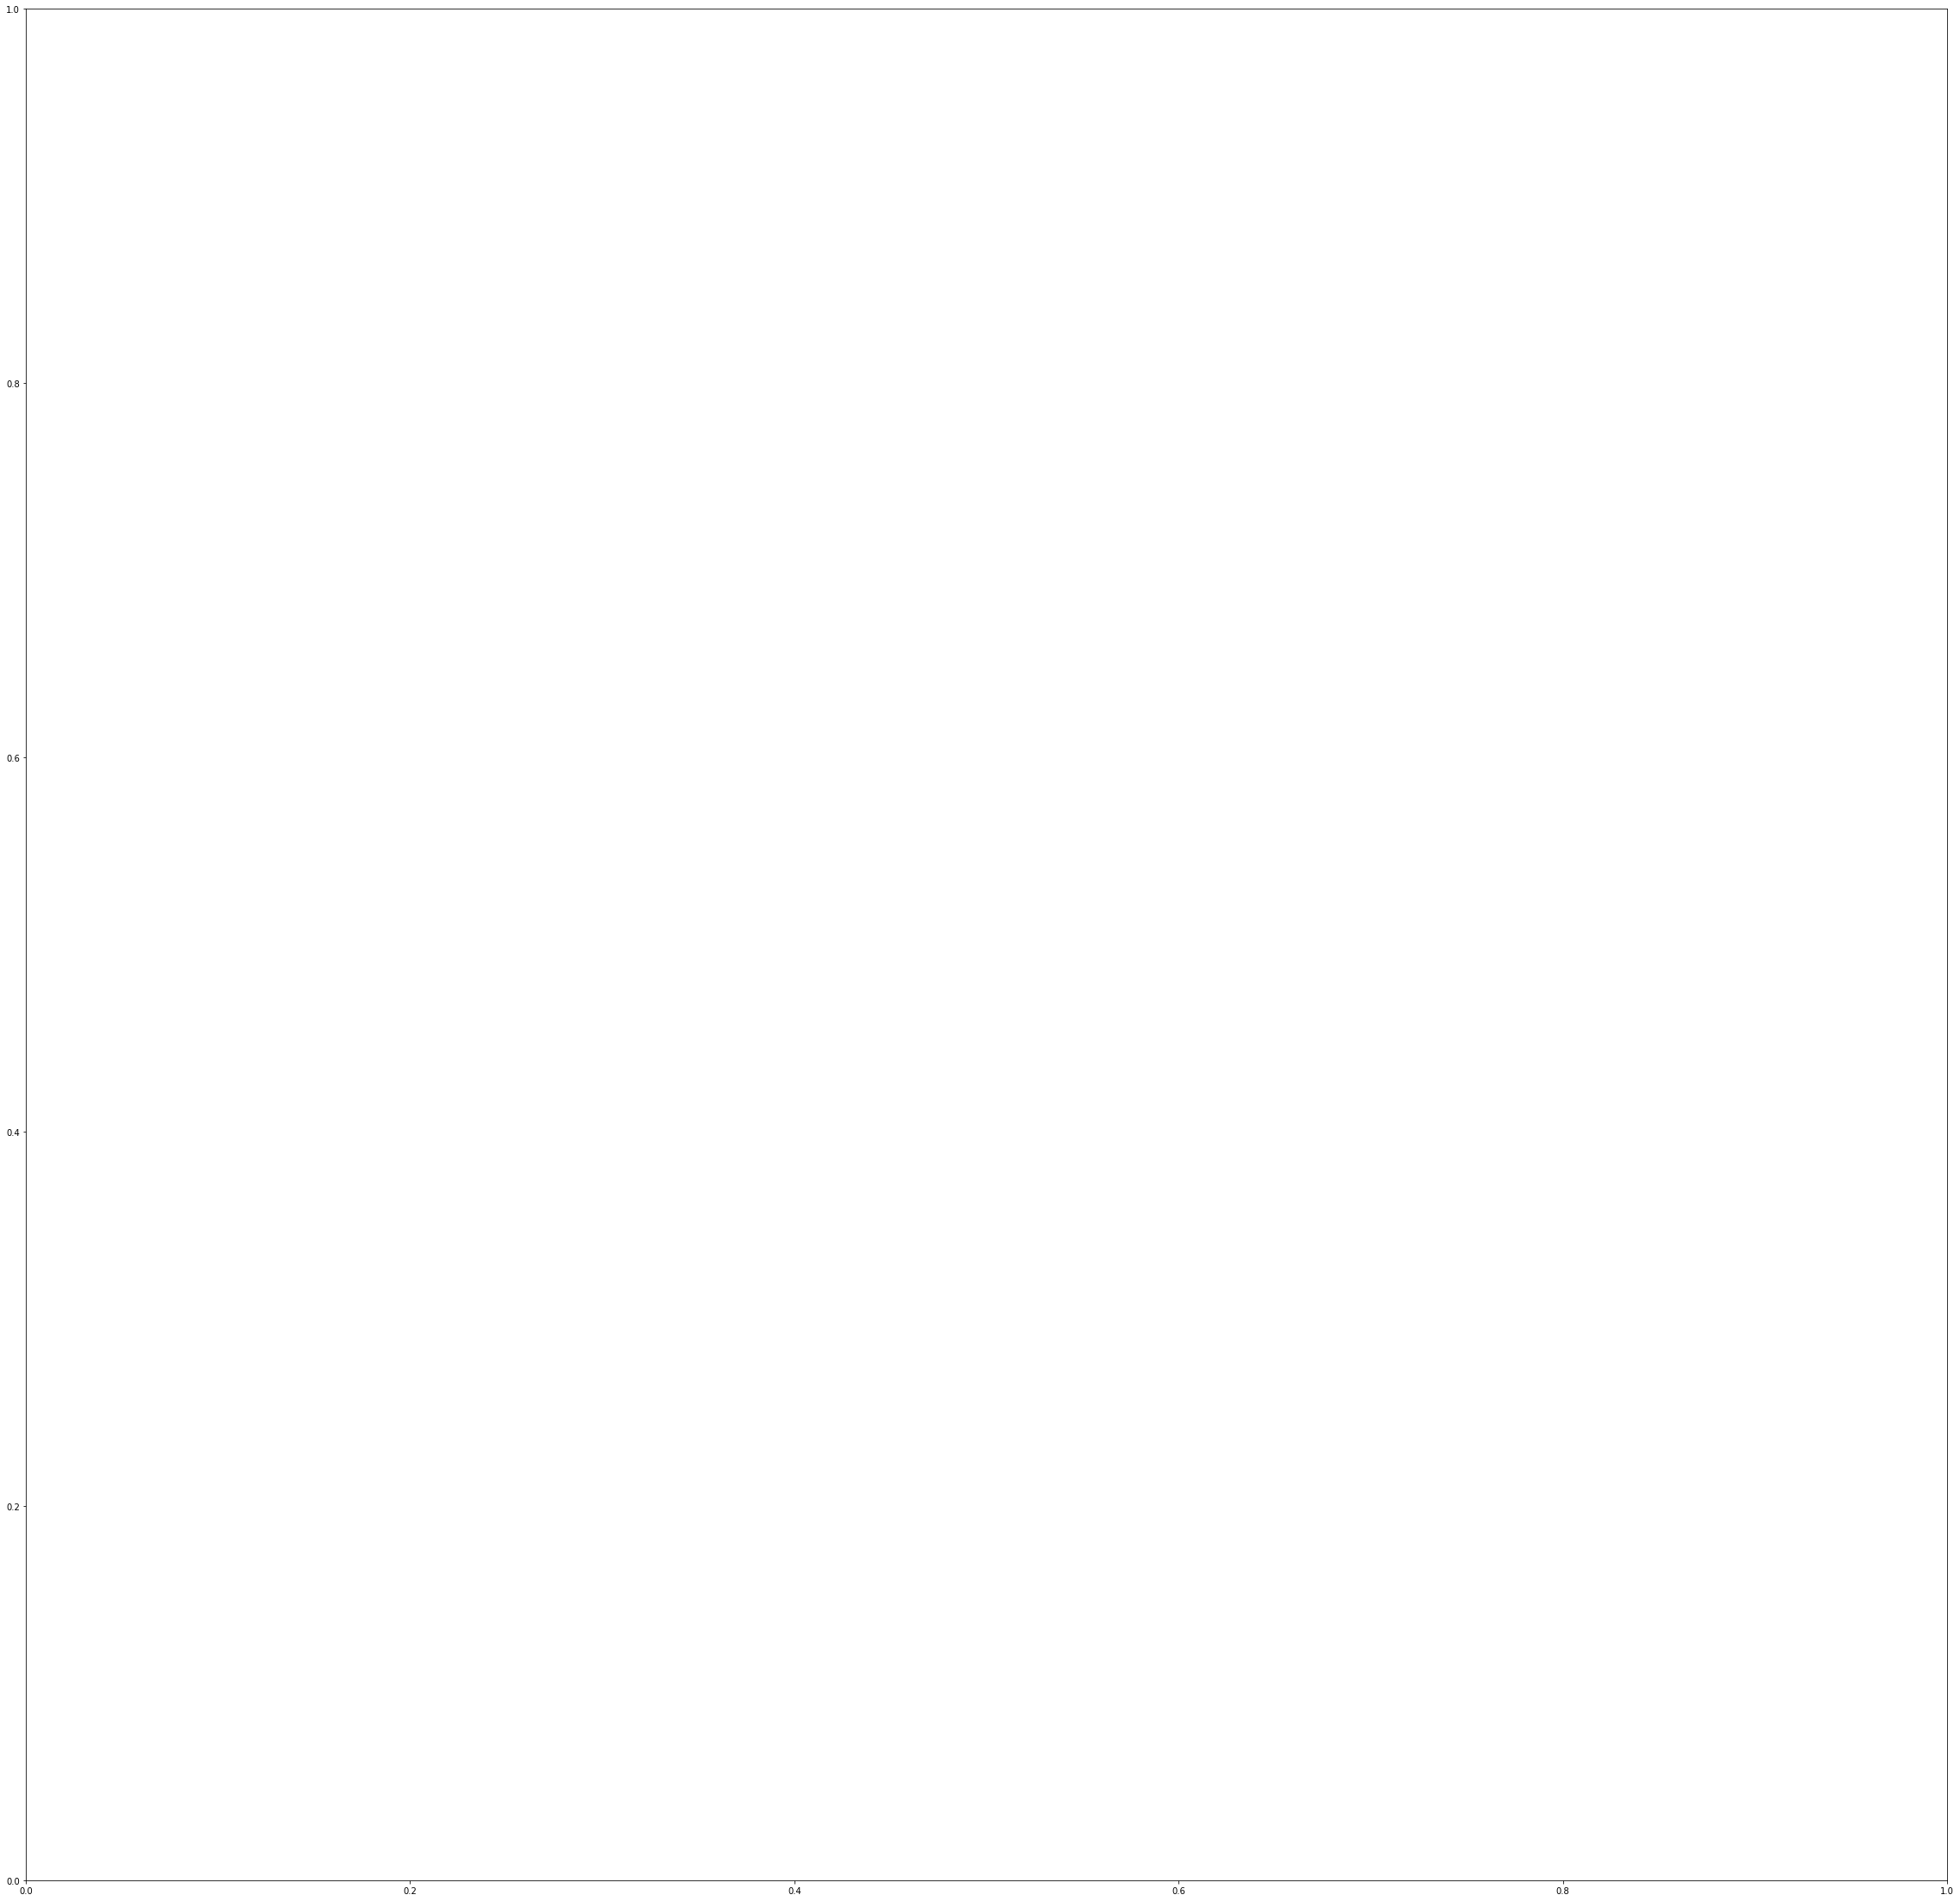

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/ne_50m_admin_1_states_provinces/
!wget -O ./datasets/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.zip https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/50m/cultural/ne_50m_admin_1_states_provinces.zip
!unzip ./datasets/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.zip  -d ./datasets/ne_50m_admin_1_states_provinces/

fig, ax = plt.subplots(figsize=(40,40))
shp_path = "./datasets/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.shp"

import geopandas

#reading states data from shape file
gdf = geopandas.read_file(shp_path)
gdf = gdf[gdf['iso_a2'] == 'US'] # selecting only US states wihtout Alaska & Hawaii
gdf = gdf[gdf['name'].apply(lambda n: n not in {'Alaska', 'Hawaii'})]

In [ ]:
from functools import lru_cache
import time

@lru_cache(maxsize=256)
def get_location(loc):
    time.sleep(1)
    return geolocator.geocode(loc)

def draw_event_map(date,country_list):
    fig, ax = plt.subplots(figsize=(15,15))
    ax = gdf.plot(ax=ax, color='lightgreen', edgecolor='gray')

    for c in country_list:
        location = get_location(c)
        if location is None:
            continue
        if not (-97 < location.longitude < -70) or not (57>location.latitude  > 25):
            continue


        plt.plot(location.longitude,location.latitude, marker='o', color='red')
        plt.annotate(s=c, xy=(location.longitude,location.latitude),
                    horizontalalignment='center', fontsize=14,color="black")
        plt.title(label="Events in {}  ".format(date),fontsize=20)

    return ax

mkdir: cannot create directory ‘./images’: File exists
mkdir: cannot create directory ‘./images/events’: File exists


100%|██████████| 10/10 [00:23<00:00,  2.31s/it]


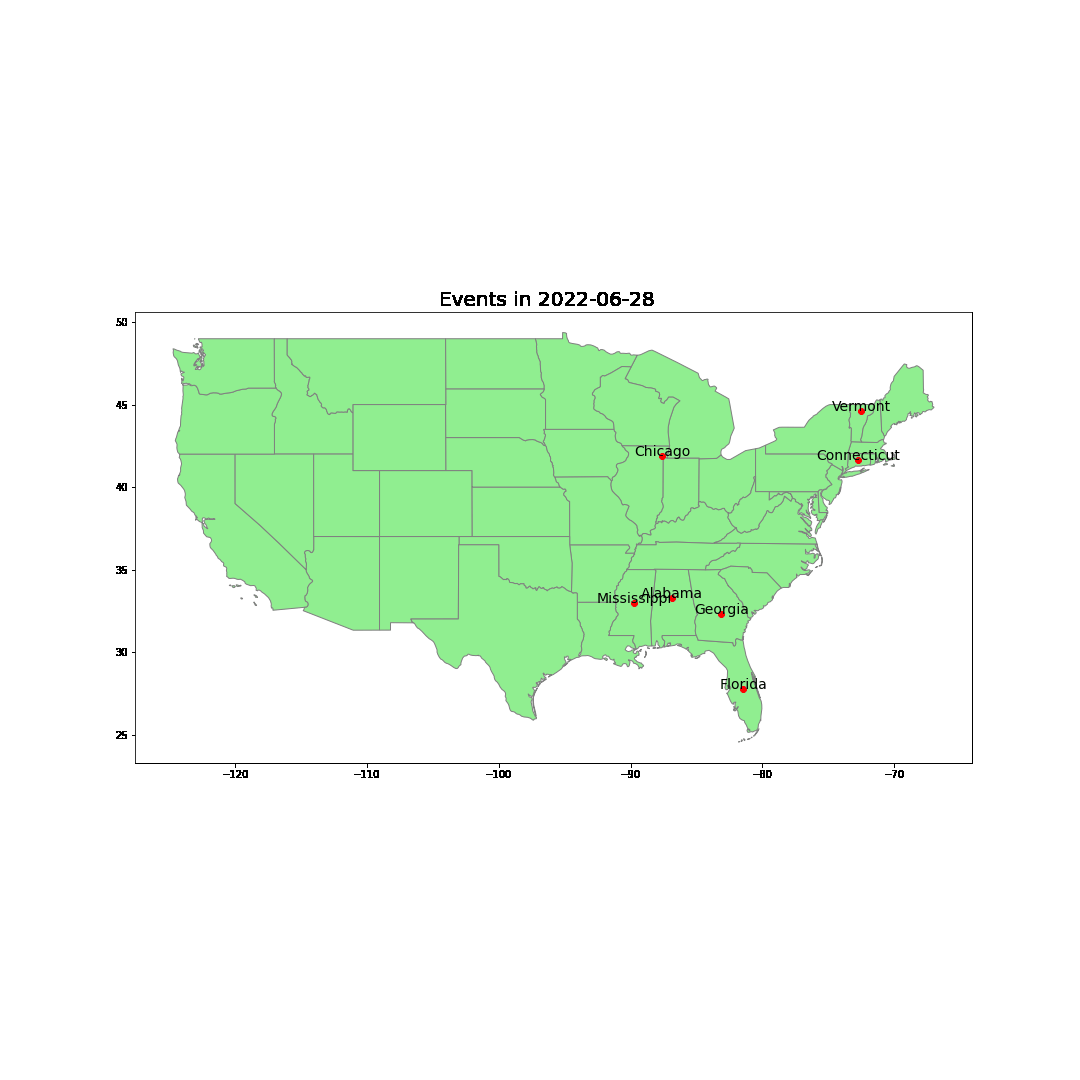

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [ ]:
from tqdm import tqdm
import imageio # need install imageio
import matplotlib.pyplot as plt

!mkdir ./images
!mkdir ./images/events

dates = event_map_df['Date'].unique()

images_path = "./images/events"
images_list = []


cuntry_set_for_date = set()
for d in tqdm(dates):
  for i in event_map_df.index:
    if event_map_df['Date'][i] == d:
      cuntry_set_for_date.add(event_map_df['Cuntry'][i])

  ax = draw_event_map(d,cuntry_set_for_date)
  cuntry_set_for_date = set()

  img_path = f"{images_path}/{d}_events.png"
  plt.savefig(img_path)
  images_list.append(img_path)
  plt.clf()



images = []
for filename in images_list:
    images.append(imageio.imread(filename))
imageio.mimsave(f"{images_path}/all_events.gif", images, duration=1 )

from IPython.display import Image
Image('./images/events/all_events.gif', format='png')

### Event detection - 3️⃣ visualize way

In [ ]:
event_map_df

,Date,Text,Cuntry
1650,2022-06-28,Gay Connecticut Supreme Court justice calls o...,Connecticut
471,2022-06-28,Stacey Abrams on the End of Roe v. Wade and W...,Georgia
472,2022-06-28,Stacey Abrams on the End of Roe v. Wade and W...,Georgia
473,2022-06-28,Stacey Abrams on the End of Roe v. Wade and W...,Georgia
474,2022-06-28,#StaceyAbrams on the End of Roe v. Wade and W...,Georgia
...,...,...,...
569,2022-07-07,Roe v Wade: Mississippi judge refuses to bloc...,Mississippi
568,2022-07-07,"Mississippi state’s lone abolition clinic, wh...",Mississippi
566,2022-07-07,The only clinic performing abortions in Missi...,Mississippi
562,2022-07-07,BBC News - Roe v Wade: Mississippi judge refu...,Mississippi


In [ ]:
import plotly_express as px

fig = px.bar(event_map_df, x='Cuntry',y='Text', animation_frame="Date" ,width=1800, height=400)
fig.update_layout(yaxis_range=[0, 100])

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


### 👍 Support & 👎 opposed tweets

#### Support tweets - analyzing

In [ ]:
import turicreate as tc
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import *

nltk.download('stopwords')
stop_words_set = set(stopwords.words("english"))
stemmer = PorterStemmer()

def skip_word2(w):
    if len(w) <2:
        return True
    if w.isdigit():
        return True
    if w in stop_words_set or stemmer.stem(w) in stop_words_set:
        return True
    return False

Support_df = twitter_df[twitter_df['Tweet Position'] == 'Supporter']

sf = tc.SFrame(Support_df[['Tweet Id', 'Date', 'Text']])
docs = tc.text_analytics.count_words(sf['Text'])
docs = docs.apply(lambda d: {w:v for w, v in d.items() if not skip_word2(w)})

topic_model = tc.topic_model.create(docs, num_topics=25)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Learning a topic model

Number of documents      1144

Vocabulary size      2160

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 43.7ms        | 3.8814e+06     | 0               |

+-----------+---------------+----------------+-----------------+

 **In this section we can see a wordcloud of the content of all the tweets classified as supporting the repeal of the law.**

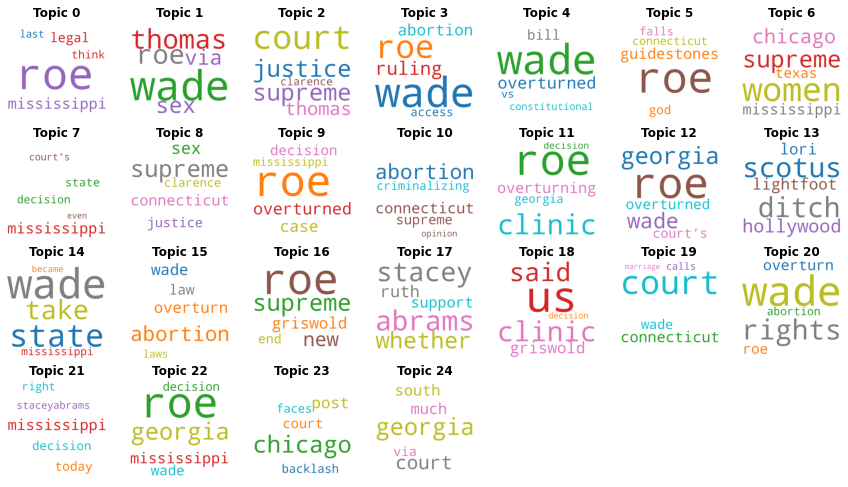

In [ ]:
from wordcloud import WordCloud, STOPWORDS

cloud = WordCloud(stopwords=stop_words_set,
                  background_color='white',
                  width=700,
                  height=700,
                  max_words=10,
                  colormap='tab10',
                  prefer_horizontal=1.0)

df = topic_model.get_topics().to_dataframe()

#fig = plt.figure(figsize=(25,25))
fig = plt.figure(figsize=(15,15))

for topic in range(0,25):
    topic_bow = {}
    for idx in df.index:
      if df['topic'][idx] == topic:
        topic_bow[df['word'][idx]] = df['score'][idx]*100

    ax = fig.add_subplot(7,7,topic+1)
    ax.set_title('Topic {}'.format(topic), fontweight ="bold")
    cloud.generate_from_frequencies(topic_bow, max_font_size=300)
    ax.imshow(cloud)
    ax.axis('off')

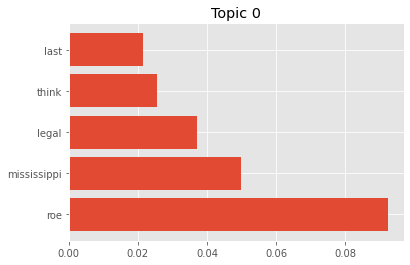

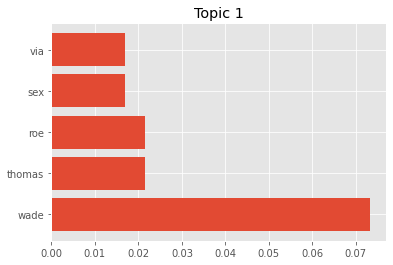

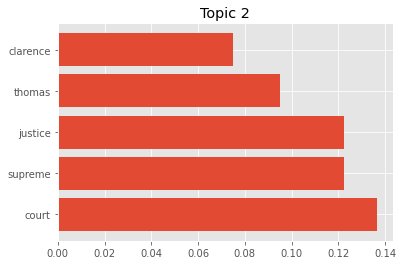

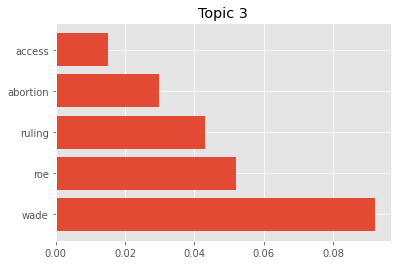

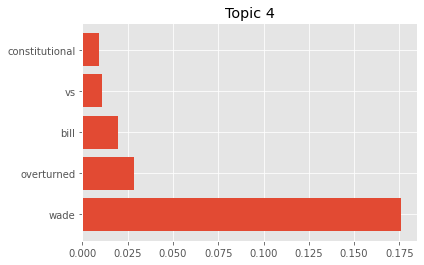

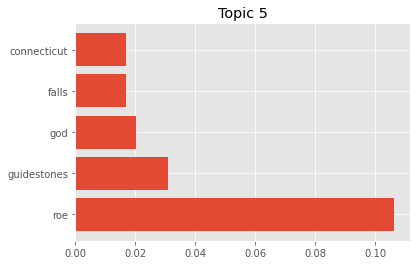

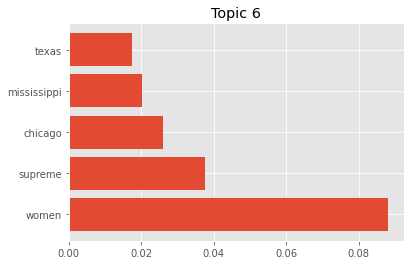

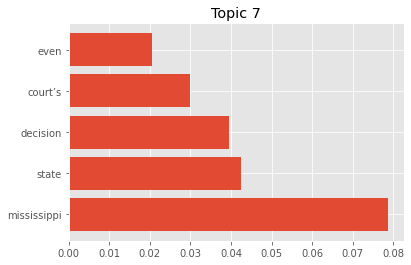

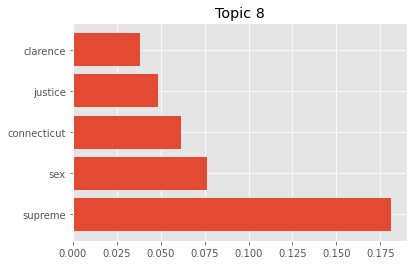

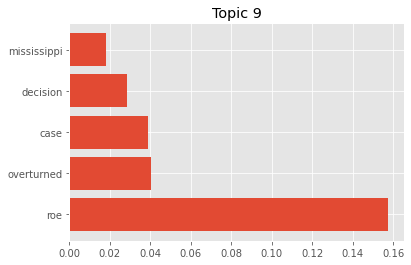

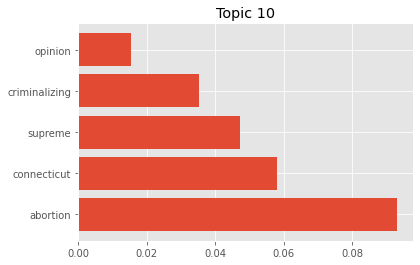

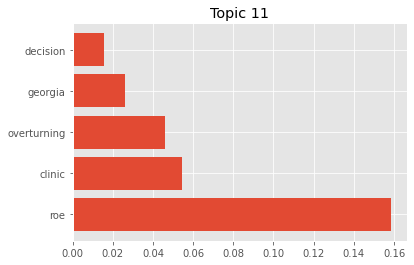

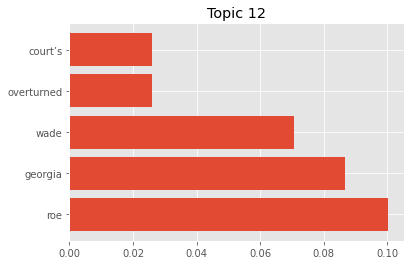

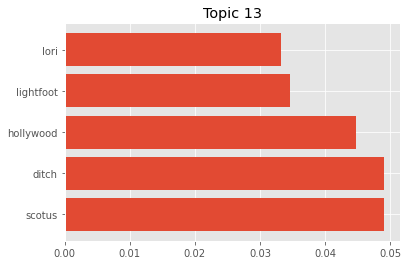

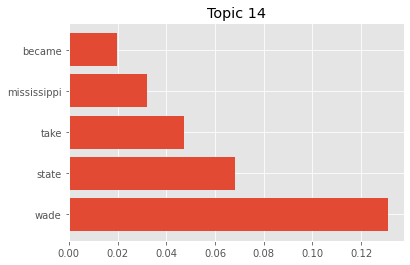

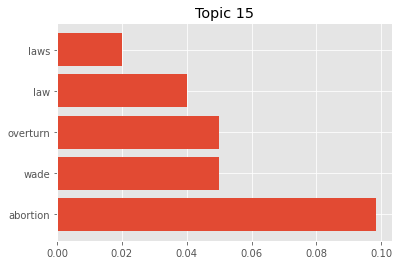

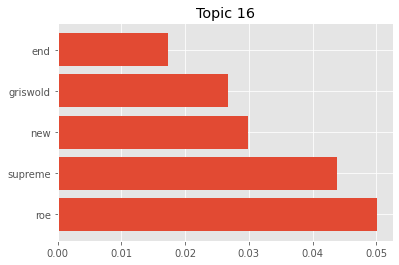

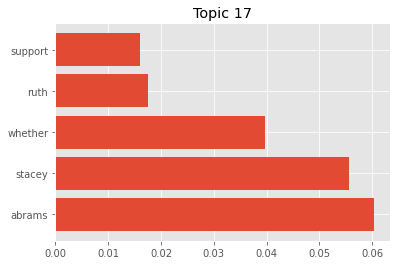

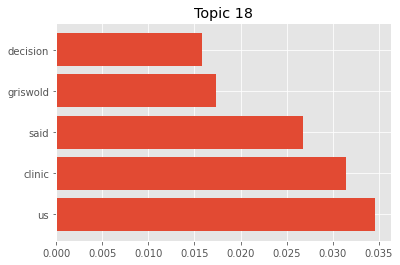

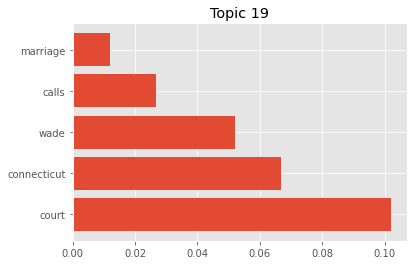

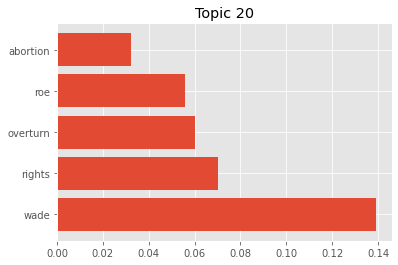

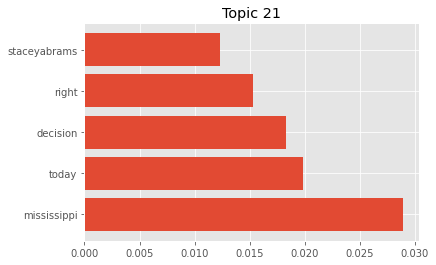

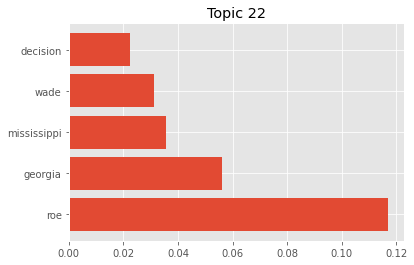

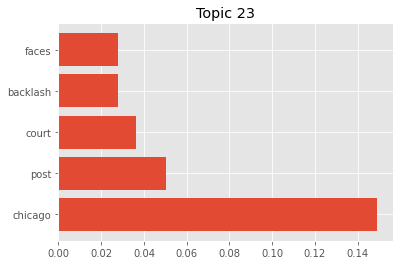

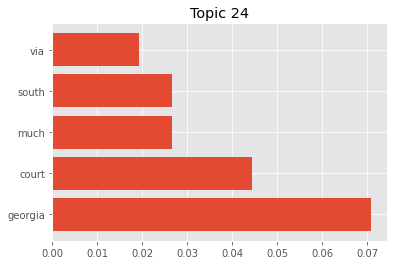

In [ ]:
import matplotlib.pyplot as plt

df = topic_model.get_topics().to_dataframe()

for topic in range(0,25):
    topic_df = df[df['topic'] == topic]
    plt.style.use('ggplot')
    plt.barh(topic_df['word'],topic_df['score'])
    plt.title('Topic {}'.format(topic))
    plt.show()

#### opposed tweets - analyzing

In [ ]:
import turicreate as tc
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import *

nltk.download('stopwords')
stop_words_set = set(stopwords.words("english"))
stemmer = PorterStemmer()

def skip_word2(w):
    if len(w) <2:
        return True
    if w.isdigit():
        return True
    if w in stop_words_set or stemmer.stem(w) in stop_words_set:
        return True
    return False

opposed_df = twitter_df[twitter_df['Tweet Position'] == 'opposed']

sf = tc.SFrame(opposed_df[['Tweet Id', 'Date', 'Text']])
docs = tc.text_analytics.count_words(sf['Text'])
docs = docs.apply(lambda d: {w:v for w, v in d.items() if not skip_word2(w)})

topic_model = tc.topic_model.create(docs, num_topics=15)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Learning a topic model

Number of documents       507

Vocabulary size      1101

Running collapsed Gibbs sampling

+-----------+---------------+----------------+-----------------+

| Iteration | Elapsed Time  | Tokens/Second  | Est. Perplexity |

+-----------+---------------+----------------+-----------------+

| 10        | 22.911ms      | 2.67986e+06    | 0               |

+-----------+---------------+----------------+-----------------+

 **In this section we can see a wordcloud of the content of all the tweets classified as opposing the repeal of the law.**

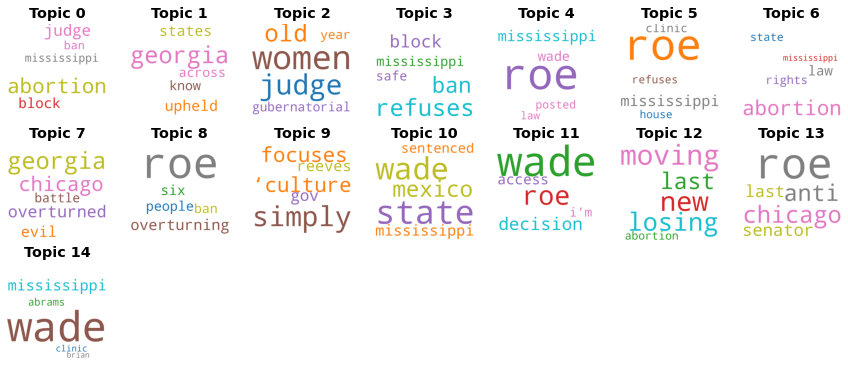

In [ ]:
from wordcloud import WordCloud, STOPWORDS

cloud = WordCloud(stopwords=stop_words_set,
                  background_color='white',
                  width=700,
                  height=700,
                  max_words=10,
                  colormap='tab10',
                  prefer_horizontal=1.0)

df = topic_model.get_topics().to_dataframe()

fig = plt.figure(figsize=(15,15))

for topic in range(0,15):
    topic_bow = {}
    for idx in df.index:
      if df['topic'][idx] == topic:
        topic_bow[df['word'][idx]] = df['score'][idx]*100

    ax = fig.add_subplot(7,7,topic+1)
    ax.set_title('Topic {}'.format(topic), fontweight ="bold")
    cloud.generate_from_frequencies(topic_bow, max_font_size=300)
    ax.imshow(cloud)
    ax.axis('off')

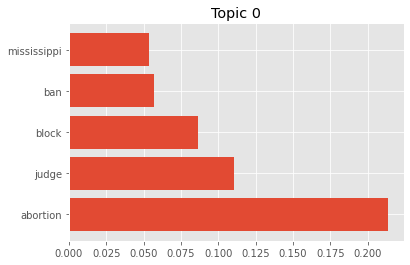

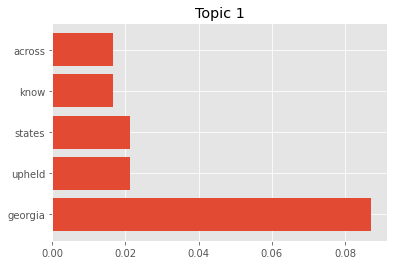

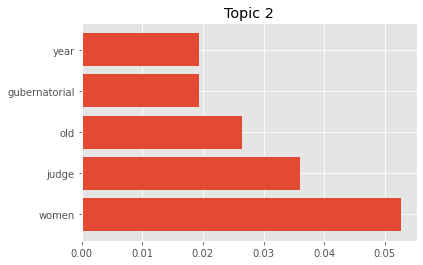

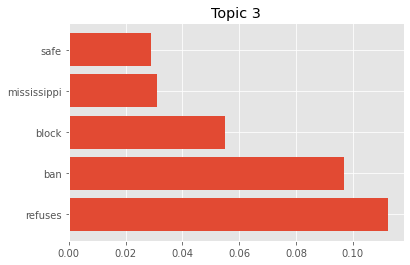

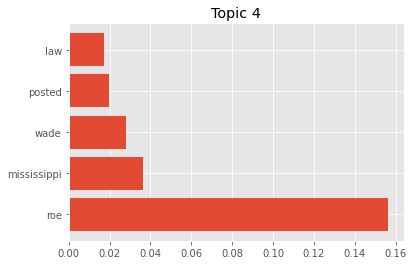

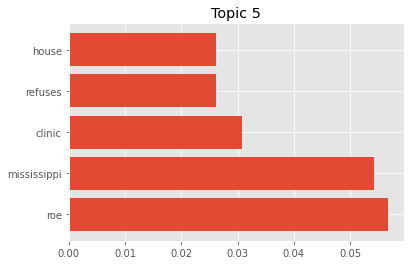

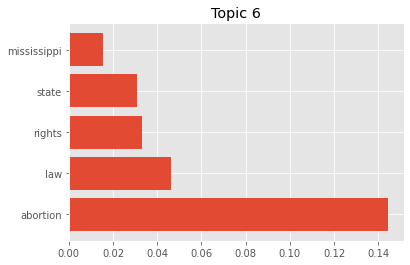

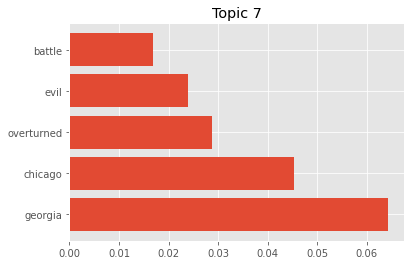

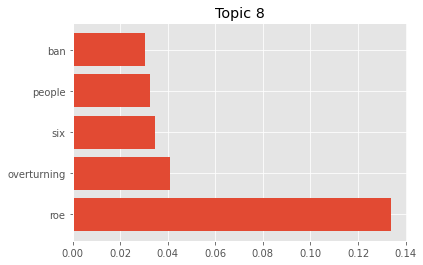

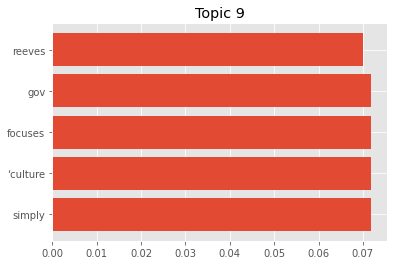

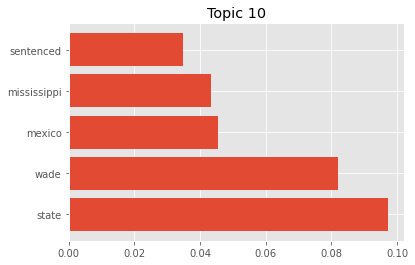

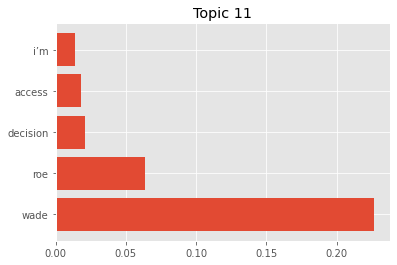

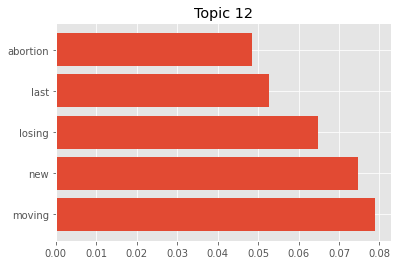

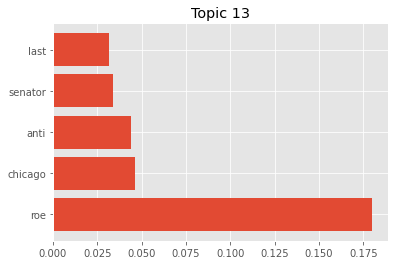

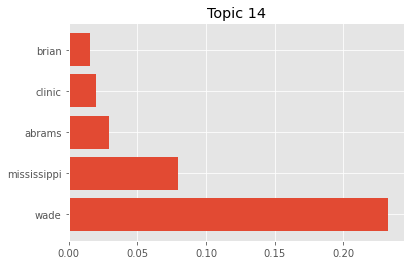

In [ ]:
import matplotlib.pyplot as plt

df = topic_model.get_topics().to_dataframe()

for topic in range(0,15):
    topic_df = df[df['topic'] == topic]
    plt.style.use('ggplot')
    plt.barh(topic_df['word'],topic_df['score'])
    plt.title('Topic {}'.format(topic))
    plt.show()